In [ ]:
#major project 1 on Choose any dataset of your choice and apply a suitable CLASSIFIER/REGRESSOR


In [ ]:
#dataset -Heart Disease Dataset
#link for dataset- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
#Context
#"target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [ ]:
#1.Take the data and create dataframe
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
#target - 0 and
#0 = no disease
#1 = disease

In [ ]:
%%capture
"""Attribute Information:
age: Age of the individual (integer)
sex: Gender of the individual (integer) 1= male; 0 = female
cp: Chest pain type (integer)
trestbps: Resting blood pressure (integer)
chol: Serum cholesterol level (integer)
fbs: Fasting blood sugar level (integer) (1 = true; 0 = false)
restecg: Resting electrocardiographic results (integer)
thalach: Maximum heart rate achieved (integer)
exang: Exercise-induced angina (integer)
oldpeak: ST depression induced by exercise relative to rest (float)
slope: Slope of the peak exercise ST segment (integer)
ca: Number of major vessels colored by fluoroscopy (integer)
thal: Thalassemia (integer)
target: Presence of heart disease (integer)

"""


In [ ]:
df.shape


(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#exact count of target i.e total number of presence of disease and no disease
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

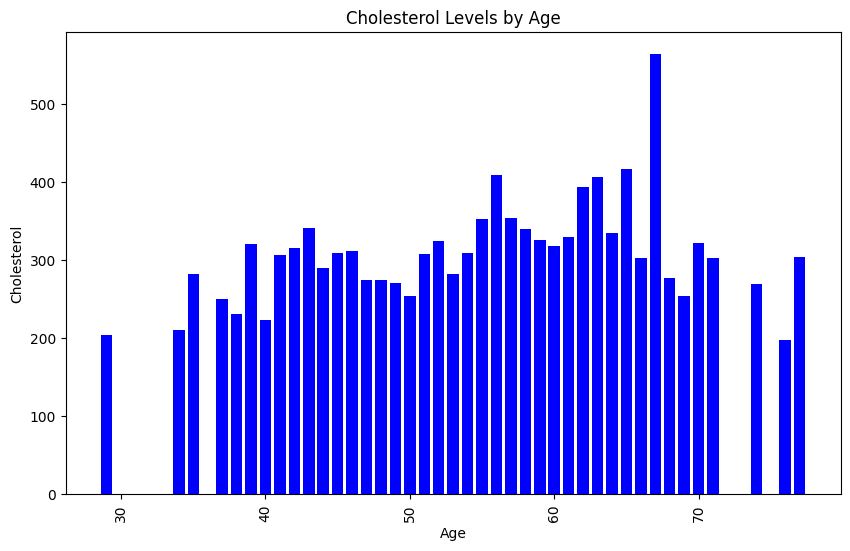

In [ ]:
#Visualization
#age vs cholesterol
import pandas as pd
import matplotlib.pyplot as plt
age = df['age']
chol = df['chol']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(age, chol, color='blue')

# Customizing the plot
plt.title('Cholesterol Levels by Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


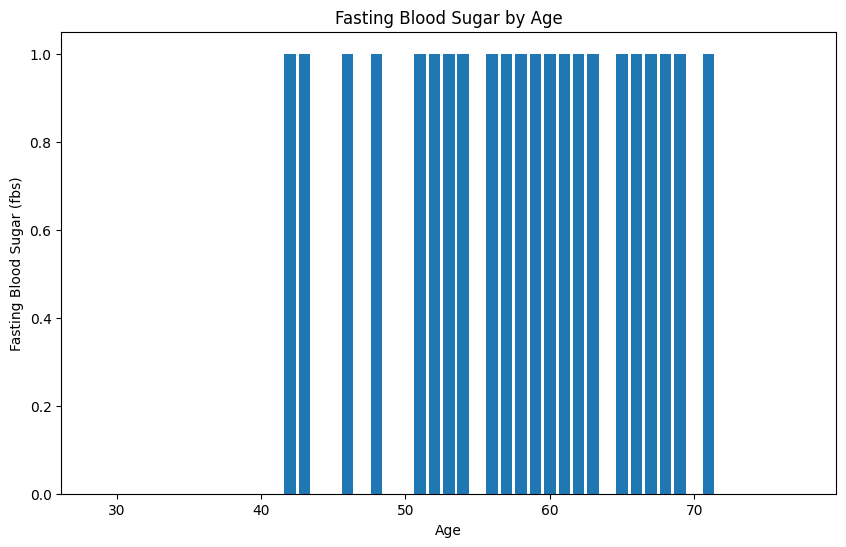

In [ ]:
#age vs Fasting Blood Sugar
plt.figure(figsize=(10, 6))
plt.bar(df['age'], df['fbs'])
plt.xlabel('Age')
plt.ylabel('Fasting Blood Sugar (fbs)')
plt.title('Fasting Blood Sugar by Age')
plt.show()

In [ ]:
#considering age and cholestrol as inputs would be more accurate
#also taking Target as output

In [74]:
#divide the data into i/p and o/p
x = df.iloc[:,0:13].values
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [75]:
y = df.iloc[:,13].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
#5.Train_test_split/train and test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [86]:
print(x.shape)
print(x_train.shape) #- 75%
print(x_test.shape)

print(y.shape)
print(y_train.shape) #- 75%
print(y_test.shape) #- 25%

(1025, 13)
(768, 13)
(257, 13)
(1025,)
(768,)
(257,)


In [87]:
#NORMALISATION or SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [88]:
#7.Apply Classifier,Regressor or Clusterer
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [89]:
#8.Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [90]:
#9.Predict the output
y_pred = model.predict(x_test)
y_pred #PREDCITED VALUES

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [91]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [92]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)* 100

85.99221789883269

In [94]:
#Individual Prediction1
model.predict([[66,0,0,178,228,1,1,165,1,1,1,2,3]])

array([0])

In [83]:
#Individual Prediction2
model.predict([[58,0,0,100,248,0,0,122,0,1,1,0,2]])

array([0])

In [85]:
#Individual Prediction3
model.predict([[59,1,2,150,212,1,1,157,0,1.6,2,0,2]])

array([0])